In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join("..", "src")))
from pathlib import Path

samples_folder = Path("../../samples")

In [2]:
# This notebook inspect the samples I generated for the 1000 events with 50 pileup IVF
# Changelog for this sample is store all the reco vertex positions and more reco track branches.

In [62]:
import uproot
import mplhep as hep
import awkward as ak
import hist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ROOT

Welcome to JupyROOT 6.28/00


In [3]:
file_path = (
    samples_folder / "sample/n1000_npu50_IVF/vertex_n1000_npu50_IVF_0429.root"
)

vertex_algo = "IVF"

In [4]:
file = uproot.open(file_path)

In [5]:
file["ML_tracks"].keys()

['event_nr',
 'reco_PriVtxX',
 'reco_PriVtxY',
 'reco_PriVtxZ',
 'truth_PriVtxX',
 'truth_PriVtxY',
 'truth_PriVtxZ',
 'reco_trk_d0',
 'reco_trk_z0',
 'reco_trk_phi',
 'reco_trk_theta',
 'reco_trk_qop',
 'reco_trk_time',
 'reco_trk_err_d0',
 'reco_trk_err_z0',
 'reco_trk_err_phi',
 'reco_trk_err_theta',
 'reco_trk_err_qop',
 'reco_trk_err_time',
 'reco_trk_truth_particle_match_prob',
 'reco_trk_truth_particle_match_Id',
 'reco_trk_reco_vtx_chi2Track',
 'reco_trk_reco_vtx_ndf',
 'reco_trk_reco_vtx_vertexCompatibility',
 'reco_trk_reco_vtx_trackWeight',
 'reco_trk_truth_vtx_idx',
 'reco_trk_reco_vtx_idx']

In [6]:
ML_tracks = file["ML_tracks"].arrays()
vertexing = file["vertexing"].arrays()

In [14]:
np.mean(ak.count(ML_tracks.truth_PriVtxZ, axis=1))

51.097

In [15]:
output_path = Path("./n1000_npu50_IVF_0429")
output_path.mkdir(
    parents=True, exist_ok=True
) if not output_path.exists() else None

# Truth Vertex distribution

## n truth vertex

In [16]:
hist_n_truth_PriVtx = hist.Hist(
    hist.axis.Regular(
        40,
        30,
        70,
        name="hist_n_truth_PriVtx",
        label="Number of Truth Primary Vertex",
    )
)
hist_n_truth_PriVtx.fill(ak.count(ML_tracks.truth_PriVtxZ, axis=1))

Hist(Regular(40, 30, 70, name='hist_n_truth_PriVtx', label='Number of Truth Primary Vertex'), storage=Double()) # Sum: 993.0 (1000.0 with flow)

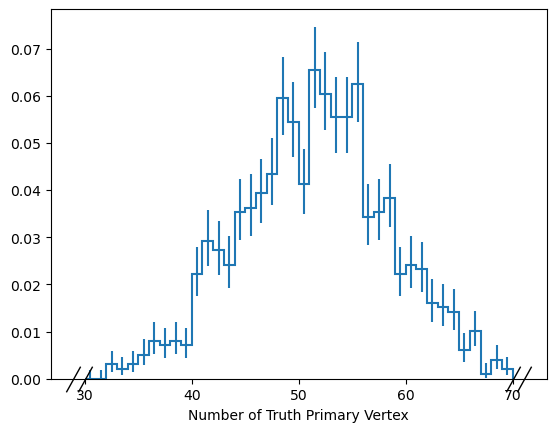

In [17]:
fig, ax = plt.subplots()
hep.histplot(hist_n_truth_PriVtx, density=True, histtype="step")
fig.savefig(output_path / "hist_n_truth_PriVtx.png")

## truth vertex vz

In [18]:
hist_truth_PriVtxZ = hist.Hist(
    hist.axis.Regular(
        101,
        -200,
        200,
        name="hist_truth_PriVtxZ",
        label="Truth Primary Vertex Z [mm]",
    )
)
hist_truth_PriVtxZ.fill(ak.flatten(ML_tracks["truth_PriVtxZ"]))

Hist(Regular(101, -200, 200, name='hist_truth_PriVtxZ', label='Truth Primary Vertex Z [mm]'), storage=Double()) # Sum: 51079.0 (51097.0 with flow)

55.88865415291081


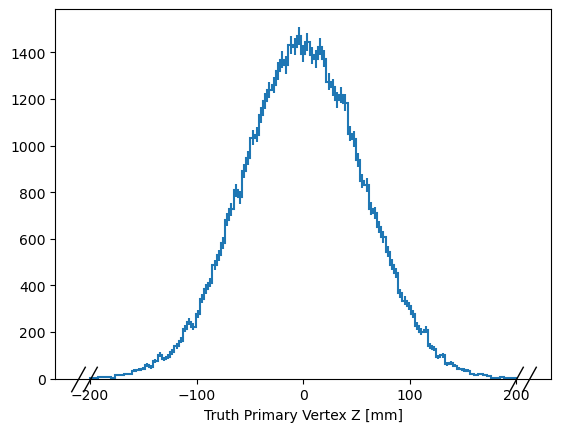

In [19]:
fig, axs = plt.subplots()
hep.histplot(hist_truth_PriVtxZ, density=False, histtype="step")
print(np.std(ak.flatten(ML_tracks["truth_PriVtxZ"])))
fig.savefig(output_path / "hist_truth_PriVtxZ.png")

# Reco Vertex distribution

In [20]:
assert np.all(vertexing.nRecoVtx == ak.count(ML_tracks.reco_PriVtxZ, axis=1))

## n reco vertex

In [21]:
hist_n_reco_PriVtx = hist.Hist(
    hist.axis.Regular(
        40,
        0,
        40,
        name="hist_n_reco_PriVtx",
        label="Number of Reco Primary Vertex",
    )
)
hist_n_reco_PriVtx.fill(ak.count(ML_tracks.reco_PriVtxZ, axis=1))

Hist(Regular(40, 0, 40, name='hist_n_reco_PriVtx', label='Number of Reco Primary Vertex'), storage=Double()) # Sum: 1000.0

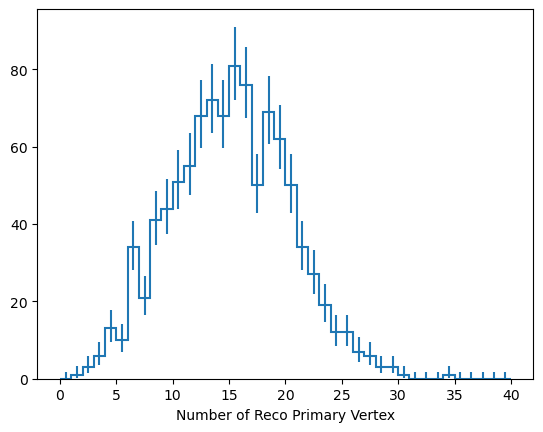

In [22]:
fig, ax = plt.subplots()
hep.histplot(hist_n_reco_PriVtx, density=False, histtype="step")
fig.savefig(output_path / "hist_n_reco_PriVtx.png")

## reco vertex vz

In [23]:
hist_reco_PriVtxZ = hist.Hist(
    hist.axis.Regular(
        101,
        -200,
        200,
        name="hist_reco_PriVtxZ",
        label="Reco Primary Vertex Z [mm]",
    )
)
hist_reco_PriVtxZ.fill(ak.flatten(ML_tracks["reco_PriVtxZ"]))

Hist(Regular(101, -200, 200, name='hist_reco_PriVtxZ', label='Reco Primary Vertex Z [mm]'), storage=Double()) # Sum: 14602.0 (14634.0 with flow)

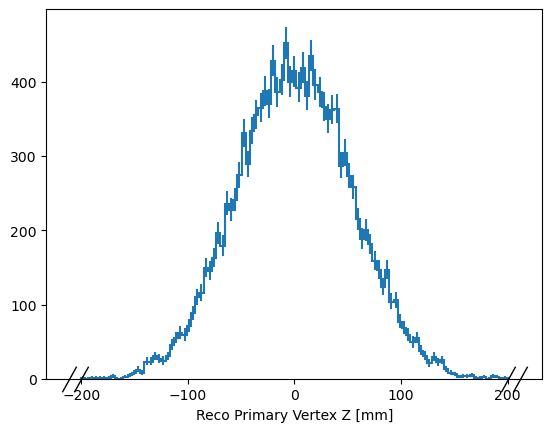

In [24]:
fig, ax = plt.subplots()
hep.histplot(hist_reco_PriVtxZ, density=False, histtype="step")
fig.savefig(output_path / "hist_reco_PriVtxZ.png")

# n reco vtx vs n truth vtx

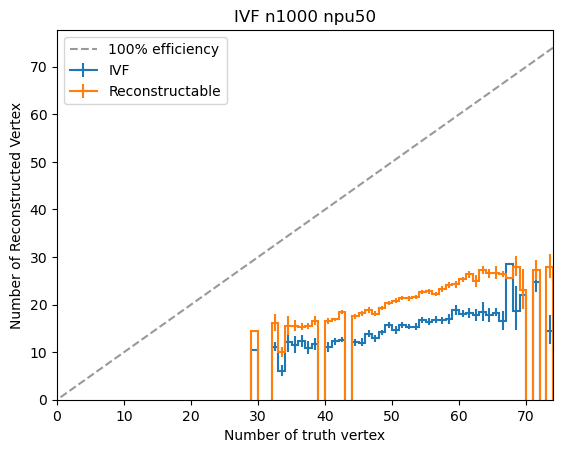

In [25]:
max_value = np.max(vertexing.nTrueVtx)

TH2_vtx_vs_pu = (
    hist.Hist.new.Reg(
        max_value,
        0,
        max_value,
        name="num_truth_vtx",
        label="Number of truth vertex",
        flow=True,
    )
    .Reg(
        max_value,
        0,
        max_value,
        name="num_reco_vtx",
        label="Number of reco vertex",
        flow=True,
    )
    .Double()
)
TH2_vtx_vs_pu.fill(vertexing.nTrueVtx, vertexing.nRecoVtx)
hprofile_truth_vs_reco = TH2_vtx_vs_pu.profile("num_reco_vtx")


TH2_reconstructable_vtx_vs_pu = (
    hist.Hist.new.Reg(
        max_value,
        0,
        max_value,
        name="num_truth_vtx",
        label="Number of truth vertex",
        flow=True,
    )
    .Reg(
        max_value,
        0,
        max_value,
        name="num_reconstructable_vtx_vs_pu",
        label="Number of reconstructable vertex",
        flow=True,
    )
    .Double()
)
TH2_reconstructable_vtx_vs_pu.fill(
    vertexing.nTrueVtx, vertexing.nVtxReconstructable
)
hprofile_reconstructable_vs_reco = TH2_reconstructable_vtx_vs_pu.profile(
    "num_reconstructable_vtx_vs_pu"
)

fig, ax = plt.subplots()
hprofile_truth_vs_reco.plot(label=vertex_algo)
hprofile_reconstructable_vs_reco.plot(label="Reconstructable")

# bin_values, bin_edges = hprofile.to_numpy()
# ax.stairs(bin_values,  bin_edges)
ax.set_ylabel("Number of Reconstructed Vertex")
ax.set_title(f"{vertex_algo} n1000 npu50")
ax.plot(
    [max_value, 0.0],
    [max_value, 0.0],
    "--",
    color=(0.6, 0.6, 0.6),
    label="100% efficiency",
)

ax.legend()
ax.set_xlim(0, max_value)
# ax.text(0.5, 0.5, f"Mean: {hprofile.values()[0]:.2f}", transform=ax.transAxes)
plt.savefig(output_path / "num_vtx_vs_pu.png")

# reco vtx diff Z

In [26]:
def calculate_differenceZ(vtx_vz: ak.highlevel.Array):
    differenceZ = []
    for vtx_vz_event in vtx_vz:
        distance_all_pairs = ak.flatten(vtx_vz_event[:, None] - vtx_vz_event)
        differenceZ.append(distance_all_pairs[distance_all_pairs != 0])

    return differenceZ

In [27]:
reco_vtx_vz = ML_tracks.reco_PriVtxZ
truth_vtx_vz = ML_tracks.truth_PriVtxZ


### Plot the reco vtx
hist_differenceZ = hist.Hist(
    hist.axis.Regular(bins=50, start=-5, stop=5, name="diffZ")
)
differenceZ = calculate_differenceZ(reco_vtx_vz)
# flatten the list
differenceZ = np.concatenate(differenceZ)
hist_differenceZ.fill(differenceZ)
# plot_hist(hist_differenceZ, output_path, output_name=f'diffZ_amvf_pu{pu_number}', pu_number = pu_number, is_truth=False)

### Plot the truth vtx
differenceZ_truth = calculate_differenceZ(truth_vtx_vz)
hist_differenceZ_truth = hist_differenceZ.copy()
hist_differenceZ_truth.reset()
differenceZ_truth = np.concatenate(differenceZ_truth)
hist_differenceZ_truth.fill(differenceZ_truth)
# plot_hist(hist_differenceZ_truth, output_path, output_name=f'diffZ_truth_pu{pu_number}', pu_number = pu_number, is_truth=True)

Hist(Regular(50, -5, 5, name='diffZ'), storage=Double()) # Sum: 131672.0 (2610474.0 with flow)

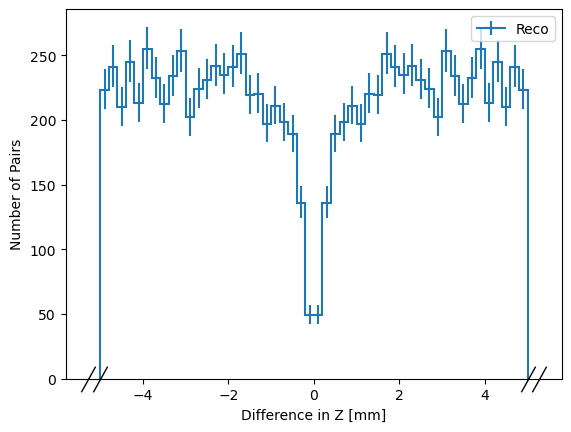

In [28]:
fig, ax = plt.subplots()

hep.histplot(hist_differenceZ, density=False, histtype="step", label="Reco")
# hep.histplot(hist_differenceZ_truth, density=False, histtype='step', label="Truth")
ax.set_xlabel("Difference in Z [mm]")
ax.set_ylabel("Number of Pairs")
ax.legend()
fig.savefig(output_path / "diffZ.png")

# Reco Vertex classification

In [106]:
from enum import Enum

vxMatchWeight = 0.7
cutMinTruthRecoRadialDiff = 0.1


class VertexMatchType(Enum):
    """Copy the definitions here
    https://acode-browser1.usatlas.bnl.gov/lxr/source/athena/InnerDetector/InDetValidation/InDetTruthVertexValidation/InDetTruthVertexValidation/InDetVertexTruthMatchUtils.h?v=21.9#0020
    """

    MATCHED = 0
    MERGED = 1
    SPLIT = 2
    FAKE = 3
    DUMMY = 4
    NTYPES = 5


class HardScatterType(Enum):
    """Copy the definitions here
    https://acode-browser1.usatlas.bnl.gov/lxr/source/athena/InnerDetector/InDetValidation/InDetTruthVertexValidation/InDetTruthVertexValidation/InDetVertexTruthMatchUtils.h?v=21.9#0030
    """

    CLEAN = 0
    LOWPU = 1
    HIGHPU = 2
    HSSPLIT = 3
    NONE = 4
    NHSTYPES = 5


vxMatchWeight = 0.7
cutMinTruthRecoRadialDiff = 0.1


def classifyRecoVertex(RecoVertexMatchInfo: np.ndarray) -> list:
    reco_vtx_type = np.zeros(VertexMatchType.NTYPES.value, dtype=int)
    n_reco_vtx = RecoVertexMatchInfo[1].shape[0] - 1  # exclude dummy vertex

    normalized_RecoVertexMatchInfo = RecoVertexMatchInfo[2] / np.sum(
        RecoVertexMatchInfo[2], axis=0
    )
    np.nan_to_num(normalized_RecoVertexMatchInfo, copy=False)

    vtx_types = -1 * np.ones(n_reco_vtx + 1, dtype=int)

    for reco_vtx_id in range(1, 1 + n_reco_vtx):
        max_weight_idx = np.argmax(RecoVertexMatchInfo[2, reco_vtx_id])

        if (
            normalized_RecoVertexMatchInfo[reco_vtx_id, max_weight_idx]
            > vxMatchWeight
        ):
            reco_vtx_type[VertexMatchType.MATCHED.value] += 1
            vtx_types[reco_vtx_id] = VertexMatchType.MATCHED.value
        elif (
            normalized_RecoVertexMatchInfo[reco_vtx_id, max_weight_idx]
            < vxMatchWeight
        ):
            if (
                normalized_RecoVertexMatchInfo[reco_vtx_id, max_weight_idx]
                == RecoVertexMatchInfo[2, reco_vtx_id].max()
            ):
                reco_vtx_type[VertexMatchType.MERGED.value] += 1
                vtx_types[reco_vtx_id] = VertexMatchType.MERGED.value
            else:
                reco_vtx_type[VertexMatchType.SPLIT.value] += 1
                vtx_types[reco_vtx_id] = VertexMatchType.SPLIT.value
        elif max_weight_idx == 0:
            reco_vtx_type[VertexMatchType.FAKE.value] += 1
            vtx_types[reco_vtx_id] = VertexMatchType.FAKE.value
        else:
            reco_vtx_type[VertexMatchType.SPLIT.value] += 1
            vtx_types[reco_vtx_id] = VertexMatchType.SPLIT.value

    # for reco_vtx_id in range(1, 1+n_reco_vtx):
    #     if vtx_types[reco_vtx_id] != -1 :
    #         continue

    return vtx_types, reco_vtx_type


def classifyHardScatter(
    RecoVertexMatchInfo: np.ndarray, vtx_types: dict
) -> HardScatterType:
    # count how many reco vtx the truth HS contributes to
    n_contribution_from_truth_HS = np.count_nonzero(
        RecoVertexMatchInfo[0, :, 1]
    )

    if n_contribution_from_truth_HS == 0:
        return HardScatterType.NONE
    elif n_contribution_from_truth_HS == 1:
        # find the only one reco idx that truth HS contributes to
        reco_vtx_idx = np.flatnonzero(RecoVertexMatchInfo[0, :, 1] != 0)[0]
        # check if the
        # FIXME athena uses the weights but here I use the sum of pt2
        is_largest_contribution = reco_vtx_idx == np.argmax(
            RecoVertexMatchInfo[1, reco_vtx_idx, :]
        )

        reco_vtx_type = vtx_types[reco_vtx_idx]
        if (
            is_largest_contribution
            and reco_vtx_type == VertexMatchType.MATCHED
        ):
            return HardScatterType.CLEAN
        elif (
            is_largest_contribution and reco_vtx_type == VertexMatchType.MERGED
        ):
            return HardScatterType.LOWPU
        else:
            return HardScatterType.HIGHPU
    else:
        # multiple reco vertices have tracks from hard-scatter
        # count how many have hard-scatter tracks as largest contribution
        reco_vtxs_idx = np.flatnonzero(RecoVertexMatchInfo[0, :, 1] != 0)
        largest_contributution_idxs = np.argmax(
            RecoVertexMatchInfo[1, reco_vtxs_idx, :], axis=1
        )
        n_largest_contribution_from_truth_HS = np.count_nonzero(
            largest_contributution_idxs == 1
        )
        if n_largest_contribution_from_truth_HS == 0:
            return HardScatterType.HIGHPU
        elif n_largest_contribution_from_truth_HS == 1:
            # Only one reco vtx has the largest contribution
            # identify this reco vtx
            reco_vtx_idx = reco_vtxs_idx[
                np.where(largest_contributution_idxs == 1)[0][0]
            ]
            # take its vtx type
            reco_vtx_type = vtx_types[reco_vtx_idx]
            # choose the event type
            if reco_vtx_type == VertexMatchType.MATCHED:
                return HardScatterType.CLEAN
            elif reco_vtx_type == VertexMatchType.MERGED:
                return HardScatterType.LOWPU
            else:
                return HardScatterType.HIGHPU
        else:
            return HardScatterType.HSSPLIT

In [107]:
def getMatchInfo(event: ak.highlevel.Record):
    """Event base flattening and return the performance

    Args:
        event (ak.highlevel.Record): _description_
    """
    reco_vtx_vz = event.reco_PriVtxZ
    truth_vtx_vz = event.truth_PriVtxZ

    n_reco_vtx = len(reco_vtx_vz)
    n_truth_vtx = len(truth_vtx_vz)

    reco_trk_pt2 = np.power(
        (1.0 / event.reco_trk_qop * np.sin(event.reco_trk_theta)), 2
    )
    reco_trk_reco_vtx_idx = ak.values_astype(
        event.reco_trk_reco_vtx_idx + 1, "int32"
    )
    reco_trk_reco_vtx_trackWeight = event.reco_trk_reco_vtx_trackWeight
    reco_trk_truth_vtx_idx = event.reco_trk_truth_vtx_idx + 1

    # the first row is number of tracks
    # the second row is the sum of pt2 of tracks
    # the third row is the sum of the track weights of reco vertices

    RecoVertexMatchInfo = np.zeros(
        (3, n_reco_vtx + 1, n_truth_vtx + 1), dtype=float
    )
    #### FIXME Should have a better numpy way to do this instead of looping
    for reco_trk_idx in range(len(reco_trk_truth_vtx_idx)):
        truth_vtx_idx = reco_trk_truth_vtx_idx[reco_trk_idx]
        reco_vtx_idxs = reco_trk_reco_vtx_idx[reco_trk_idx]
        if truth_vtx_idx < 0:
            truth_vtx_idx = 0

        for i, reco_trk_idx in enumerate(reco_vtx_idxs):
            if reco_trk_idx < 0:
                reco_trk_idx = 0

            RecoVertexMatchInfo[0, reco_trk_idx, truth_vtx_idx] += 1
            RecoVertexMatchInfo[
                1, reco_trk_idx, truth_vtx_idx
            ] += reco_trk_pt2[reco_trk_idx]
            RecoVertexMatchInfo[
                2, reco_trk_idx, truth_vtx_idx
            ] += reco_trk_reco_vtx_trackWeight[reco_trk_idx][0]

    assert np.sum(RecoVertexMatchInfo[0, :, :]) == ak.count(
        reco_trk_reco_vtx_idx
    )

    return RecoVertexMatchInfo


def Get_local_PU_density(
    truth_vtx_vx,
    truth_vtx_vy,
    truth_vtx_vz,
    truth_HS_idx=0,
    xyz_dist_window=2.0,
):
    # Calculate the PU density around the truth HS vertex
    residual_truth_vtx_vx = truth_vtx_vx - truth_vtx_vx[truth_HS_idx]
    residual_truth_vtx_vy = truth_vtx_vy - truth_vtx_vy[truth_HS_idx]
    residual_truth_vtx_vz = truth_vtx_vz - truth_vtx_vz[truth_HS_idx]

    dist_to_truth_HS = (
        residual_truth_vtx_vx**2
        + residual_truth_vtx_vy**2
        + residual_truth_vtx_vz**2
    )
    n_local_truth = len(np.where(dist_to_truth_HS < xyz_dist_window**2)[0])
    return (n_local_truth - 1) / (2 * xyz_dist_window)

In [150]:
def do_matching(ML_tracks):
    total_reco_vtx_type = np.zeros(VertexMatchType.NTYPES.value, dtype=int)
    total_hs_type = np.zeros(HardScatterType.NHSTYPES.value, dtype=int)

    hs_reco_eff = ROOT.TEfficiency(
        "hs_reco_eff",
        "HS Reconstruction Efficiency; Local PU density; eff",
        12,
        0,
        6,
    )
    hs_sel_eff = ROOT.TEfficiency(
        "hs_sel_eff",
        "HS Selection and Reconstruction Efficiency; Local PU density; eff",
        12,
        0,
        6,
    )

    for event_idx, event_nr in enumerate(ML_tracks.event_nr):
        if event_idx % 100 == 0:
            print(f"Processing event {event_idx} / {len(ML_tracks.event_nr)}")
        event = ML_tracks[event_idx]
        reco_vtx_vx = event.reco_PriVtxX
        reco_vtx_vy = event.reco_PriVtxY
        reco_vtx_vz = event.reco_PriVtxZ
        truth_vtx_vx = event.truth_PriVtxX
        truth_vtx_vy = event.truth_PriVtxY
        truth_vtx_vz = event.truth_PriVtxZ

        RecoVertexMatchInfo = getMatchInfo(event)
        vtx_types, reco_vtx_type = classifyRecoVertex(RecoVertexMatchInfo)
        hs_type = classifyHardScatter(RecoVertexMatchInfo, vtx_types)

        total_reco_vtx_type = total_reco_vtx_type + reco_vtx_type
        total_hs_type[hs_type.value] += 1

        truth_HS_idx = 0
        idx_best_reco_HS_nTrk = (
            np.argmax(RecoVertexMatchInfo[0, :, truth_HS_idx + 1]) - 1
        )
        idx_best_reco_HS_sumpt2 = (
            np.argmax(RecoVertexMatchInfo[1].sum(axis=1)) - 1
        )

        residual = np.array(
            [
                reco_vtx_vx[idx_best_reco_HS_nTrk]
                - truth_vtx_vx[truth_HS_idx],
                reco_vtx_vy[idx_best_reco_HS_nTrk]
                - truth_vtx_vy[truth_HS_idx],
                reco_vtx_vz[idx_best_reco_HS_nTrk]
                - truth_vtx_vz[truth_HS_idx],
            ]
        )

        local_PU_density = Get_local_PU_density(
            truth_vtx_vx=truth_vtx_vx,
            truth_vtx_vy=truth_vtx_vy,
            truth_vtx_vz=truth_vtx_vz,
        )

        trhth_HS_vtx_recoed = False
        trhth_HS_vtx_recoed_seled = False
        if np.square(residual).sum() <= cutMinTruthRecoRadialDiff**2:
            trhth_HS_vtx_recoed = True
            if idx_best_reco_HS_nTrk == idx_best_reco_HS_sumpt2:
                trhth_HS_vtx_recoed_seled = True

        hs_reco_eff.Fill(trhth_HS_vtx_recoed, local_PU_density)
        hs_sel_eff.Fill(
            trhth_HS_vtx_recoed and trhth_HS_vtx_recoed_seled, local_PU_density
        )

    return total_reco_vtx_type, total_hs_type, hs_reco_eff, hs_sel_eff

In [151]:
def plot_pv_hs_classification(
    enum_Classification,
    plot_type,
    output_path=None,
    output_name=None,
    pu_number=None,
):
    if plot_type == "pv":
        enum_type = VertexMatchType
        identifier_title = "Primary vertex"

    elif plot_type == "hs":
        enum_type = HardScatterType
        identifier_title = "HS event"

    n_types = VertexMatchType.NTYPES.value
    bins_edges = np.arange(0, n_types + 1)

    bin_centers = 0.5 * (bins_edges[:-1] + bins_edges[1:])
    x_labels = enum_type._member_names_[:-1]

    fig, ax = plt.subplots()
    ax.stairs(enum_Classification)
    ax.set_xticks(bin_centers, x_labels)
    ax.set_title(f"{identifier_title} classification on IVF")
    ax.set_xlabel(f"{identifier_title} type")
    ax.set_ylabel("Number")
    fig.savefig(output_path / output_name)


def plot_eff(
    eff, plot_type, output_path=None, output_name=None, pu_number=None
):
    canvas_eff = ROOT.TCanvas()
    legend_eff = ROOT.TLegend(0.1, 0.2, 0.4, 0.4)

    eff.SetLineColor(2)
    eff.Draw()
    legend_eff.AddEntry(eff, "IVF")
    legend_eff.Draw("same")
    canvas_eff.Draw()

    canvas_eff.Print((output_path / f"{output_name}.png").as_posix())


def performance_classification_n_eff(
    input_root_path: Path,
    output_path: Path,
    ML_tracks_tree_name="ML_tracks",
):
    output_path = output_path / "classification_n_eff"
    output_path.mkdir(
        parents=True, exist_ok=True
    ) if not output_path.exists() else None
    # check_outputpath(output_path)

    ### Reading the information from TTree
    root_file = uproot.open(input_root_path)
    # file_name = input_root_path.stem # for example, vertexperformance_AMVF_pu100.root
    # pu_search_pattern = r'pu(.+)$'
    # pu_number = re.search(pu_search_pattern, file_name).group((1))

    ML_tracks = root_file[ML_tracks_tree_name].arrays()

    (
        PV_Classisfication,
        HS_Classification,
        hs_reco_eff,
        hs_sel_eff,
    ) = do_matching(ML_tracks)

    plot_pv_hs_classification(
        PV_Classisfication,
        plot_type="pv",
        output_path=output_path,
        output_name="pv_classification",
    )
    plot_pv_hs_classification(
        HS_Classification,
        plot_type="hs",
        output_path=output_path,
        output_name="hs_classification",
    )

    plot_eff(
        hs_reco_eff,
        plot_type="hs_reco_eff",
        output_path=output_path,
        output_name="hs_reco_eff",
    )
    plot_eff(
        hs_sel_eff,
        plot_type="hs_sel_eff",
        output_path=output_path,
        output_name="hs_sel_eff",
    )

Processing event 0 / 1000


/var/folders/l8/k4rv8vgs70nfv0kfc2d39n200000gn/T/ipykernel_19841/3999062721.py:39: RuntimeWarning: invalid value encountered in divide
  normalized_RecoVertexMatchInfo = RecoVertexMatchInfo[2] / np.sum(RecoVertexMatchInfo[2], axis=0)


Processing event 100 / 1000
Processing event 200 / 1000
Processing event 300 / 1000
Processing event 400 / 1000
Processing event 500 / 1000
Processing event 600 / 1000
Processing event 700 / 1000
Processing event 800 / 1000
Processing event 900 / 1000


Info in <TCanvas::Print>: png file tmp/classification_n_eff/hs_reco_eff.png has been created
Info in <TCanvas::Print>: png file tmp/classification_n_eff/hs_sel_eff.png has been created


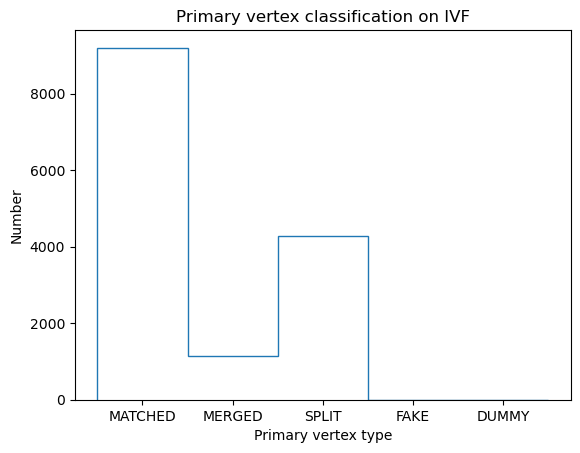

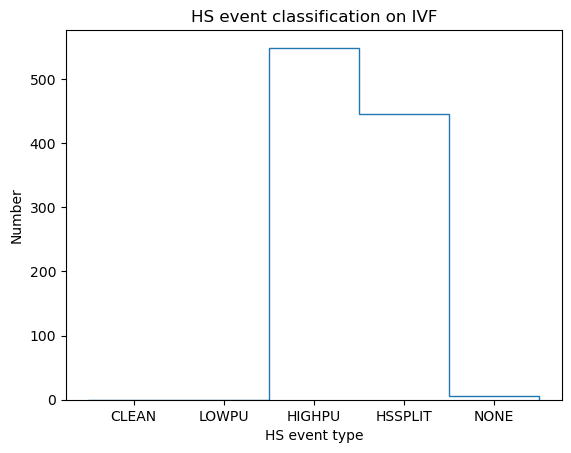

In [152]:
performance_classification_n_eff(
    input_root_path=file_path, output_path=Path("./tmp")
)